In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree

In [3]:
iris = load_iris()

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
accuracy_score(iris.target,clf.predict(iris.data))

1.0

In [7]:
#Open a file handle in write mode
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [8]:
#Write a PDF of our graph model
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("iris.pdf") 

Couldn't import dot_parser, loading of dot files will not be possible.


NameError: global name 'dot_parser' is not defined

Automatically created module for IPython interactive environment


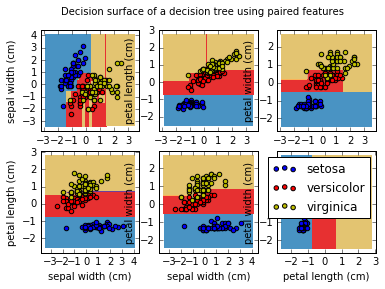

In [10]:
#Plot the data along with decision tree boundaries
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [11]:
from sklearn.datasets import load_boston

In [12]:
boston = load_boston()
regressor = tree.DecisionTreeRegressor(random_state=0)
regressor.fit(boston.data,boston.target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [13]:
from sklearn.metrics import r2_score

In [14]:
r2_score(boston.target,regressor.predict(boston.data))

1.0

In [15]:
from sklearn.cross_validation import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.33, random_state=42)

In [128]:
regressor = tree.DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [129]:
r2_score(y_test, regressor.predict(X_test))

0.7320607138663342

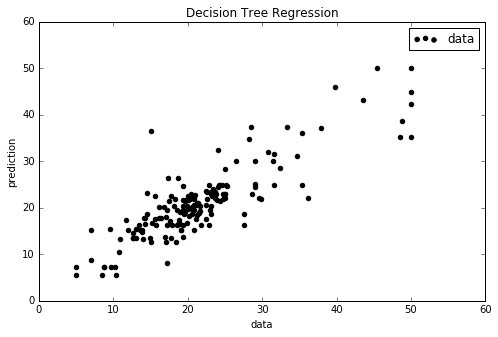

In [20]:
# Plot the results
y_1 = regressor.predict(X_test)
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_1, c="k", label="data")
plt.xlabel("data")
plt.ylabel("prediction")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [124]:
regressor2 = tree.DecisionTreeRegressor(random_state=0, min_samples_split=28)
regressor2.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=28,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [125]:
r2_score(y_test, regressor2.predict(X_test))

0.82375424929383589

In [23]:
regressor3 = tree.DecisionTreeRegressor(random_state=0, min_samples_split=35,max_depth=11)
regressor3.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=35,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [24]:
r2_score(y_test, regressor3.predict(X_test))

0.83525377581197668

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
regressor4 = RandomForestRegressor(random_state=654897)
regressor4.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=654897,
           verbose=0, warm_start=False)

In [135]:
r2_score(y_test, regressor4.predict(X_test))

0.88157862137948095